# **What is KNN?**
KNN is non-parametric, instance-based and used in a supervised learning setting. It means that
we are given a labelled dataset consiting of training observations (x,y) and would like to capture
the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that
given an unseen observation x, h(x) can condently predict the corresponding output y.

**KNN classier is also a non parametric and instance-based learning algorithm.**

**Non-parametric** means it makes no explicit assumptions about the functional form of h,
avoiding the dangers of mismodeling the underlying distribution of the data. For example,
suppose our data is highly non-Gaussian but the learning model we choose assumes a Gaussian
form. In that case, our algorithm would make extremely poor predictions.

**Instance-based** learning means that our algorithm doesn’t explicitly learn a model. Instead, it
chooses to memorize the training instances which are subsequently used as “knowledge” for
the prediction phase

**Advantages of KNN**


Quick calculation time

Simple algorithm – to interpret

Versatile – useful for regression and classication High accuracy – you do not need to compare with better-supervised learning models

No assumptions about data – no need to make additional assumptions, tune several
parameters, or build a model. This makes it crucial in nonlinear data case.


**Disadvantages of KNN**

Accuracy depends on the quality of the data

With large data, the prediction stage might be slow

Sensitive to the scale of the data and irrelevant features

Require high memory – need to store all of the training data

Given that it stores all of the training, it can be computationally expensive


**Can we use KNN for regression also? Why / Why not?**

Yes. Why not?

KNN regression is very simple algorithm and sometimes called a lazy algorithm because of its
slow learning.

In regression, it takes K neighbours and returns their average to new value. To calculate the
average, Euclidean distance is mostly used. Like classication problem, the optimal value of K is
again the biggest challenge. However, you can use cross validation to take optimal K, observing all RMSEs. But, if our dataset is noisy and does have many idle features, it will perform bad.
Really bad. So, removal of noise from data or dimensionality reduction is another important
thing here.

Moreover, feature scaling helps a lot in KNN. Although feature scaling is used mainly for
classication tasks but it can help in regression task too. And after creating the model for
regression, you can reverse-transform the normalized values once again to get the nal results.

Finally, since this is a neighbour based algorithm, this is a very useful method for anomaly
detection using outlier scores, provided that, you dataset is not noisy. From my experience, KNN
regression is sometimes powerful, simple algorithm and should be used only when your dataset
is small, clean and not wide



# **Following are the Steps in KNN :-**

1.   Importing the Libraries
2.   Reading/Loading the dataset

3.  Data Visualization and Data Normalization
4.  Splitting the dataset into Training and Testing
5.  Training the model and Predicting from model





In [5]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [6]:
import pandas as pd
ds=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Iris.csv")


In [7]:
import pandas as pd
import numpy as np
import math
import operator
from sklearn.neighbors import KNeighborsClassifier

In [8]:
print("First five rows")
print(ds.head())
print("*********")
print("columns",ds.columns)
print("*********")
print("shape:",ds.shape)
print("*********")
print("Size:",ds.size)
print("*********")
print("no of samples available for each type")
print(ds.value_counts())
print("*********")
print(ds.describe())

First five rows
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
*********
columns Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')
*********
shape: (150, 6)
*********
Size: 900
*********
no of samples available for each type
Id   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species        
150  5.9            3.0           5.1            1.8           Iris-virginica     1
56   5.7            2.8           4.5            1.3           Iris-versicolor    1
54   5.5            2.3           4.0      

In [9]:
x = ds.iloc[:,1:5]
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Which is dependent variable?

setosa,versicolor and virginica are dependent variable

In [12]:
y = ds.iloc[:,-1]
y.head(90)

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
           ...       
85    Iris-versicolor
86    Iris-versicolor
87    Iris-versicolor
88    Iris-versicolor
89    Iris-versicolor
Name: Species, Length: 90, dtype: object

Why you want to apply classification on selected dataset? Discuss full story behind dataset.

The dataset is all about classifing the species of flower by giving the feature like spedal length, spedal width , petal length, petalwidth

In [13]:
ds.shape

(150, 6)

In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
np.sqrt(150)

12.24744871391589

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 12)
knn.fit(x,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                     weights='uniform')

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .3)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [ ]:
y_test_pred = knn.predict(x_test)
y_test_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica'],
      dtype=object)

In [ ]:
prediction_output = pd.DataFrame(data = [y_test_pred, y_test])
prediction_output.transpose()

,0,1
0,Iris-virginica,Iris-virginica
1,Iris-versicolor,Iris-versicolor
2,Iris-virginica,Iris-virginica
3,Iris-setosa,Iris-setosa
4,Iris-virginica,Iris-virginica
5,Iris-setosa,Iris-setosa
6,Iris-versicolor,Iris-versicolor
7,Iris-virginica,Iris-virginica
8,Iris-versicolor,Iris-versicolor
9,Iris-virginica,Iris-virginica


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_test_pred))

[[15  0  0]
 [ 0 14  0]
 [ 0  1 15]]


In [ ]:
print("Accuracy:", knn.score(x_test,y_test))

Accuracy: 0.9777777777777777


In [ ]:
for i in range (1,15):
    knn2=KNeighborsClassifier(n_neighbors=i)
    knn2.fit(x_train, y_train)
    print("For k = %d accuracy is"%i,knn2.score(x_test,y_test))

For k = 1 accuracy is 0.9333333333333333
For k = 2 accuracy is 0.9333333333333333
For k = 3 accuracy is 0.9555555555555556
For k = 4 accuracy is 0.9333333333333333
For k = 5 accuracy is 0.9777777777777777
For k = 6 accuracy is 0.9555555555555556
For k = 7 accuracy is 1.0
For k = 8 accuracy is 0.9555555555555556
For k = 9 accuracy is 1.0
For k = 10 accuracy is 0.9555555555555556
For k = 11 accuracy is 0.9777777777777777
For k = 12 accuracy is 0.9777777777777777
For k = 13 accuracy is 0.9555555555555556
For k = 14 accuracy is 0.9777777777777777


In [16]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
neighbors = np.arange(1,30)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    
    knn.fit(x_train, y_train)
    
    train_accuracy[i] = knn.score(x_train, y_train)
    test_accuracy[i] = knn.score(x_test, y_test) 

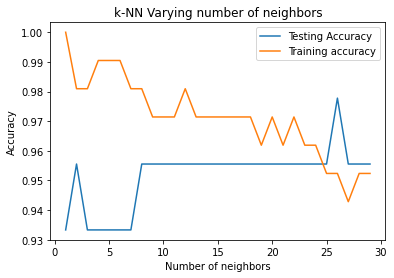

In [17]:
import matplotlib.pyplot as plt
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()